In [1]:
# current date, for retrieving data from proper location.
year = "2023"
month = "October"
day = "10"

## Imports and initialization

In [2]:
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# import Analysis_Python_Files.UnitConversion as uc
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules();

In [4]:
atomlocs = [2, 2, 3, 3, 1]

In [5]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### File 28 (2_0_rate_measurement):  

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 14:14:22: on (Y-M-D) 2023-10-9, And ended at 14:20:33: on 2023-10-9
Experiment Notes:  



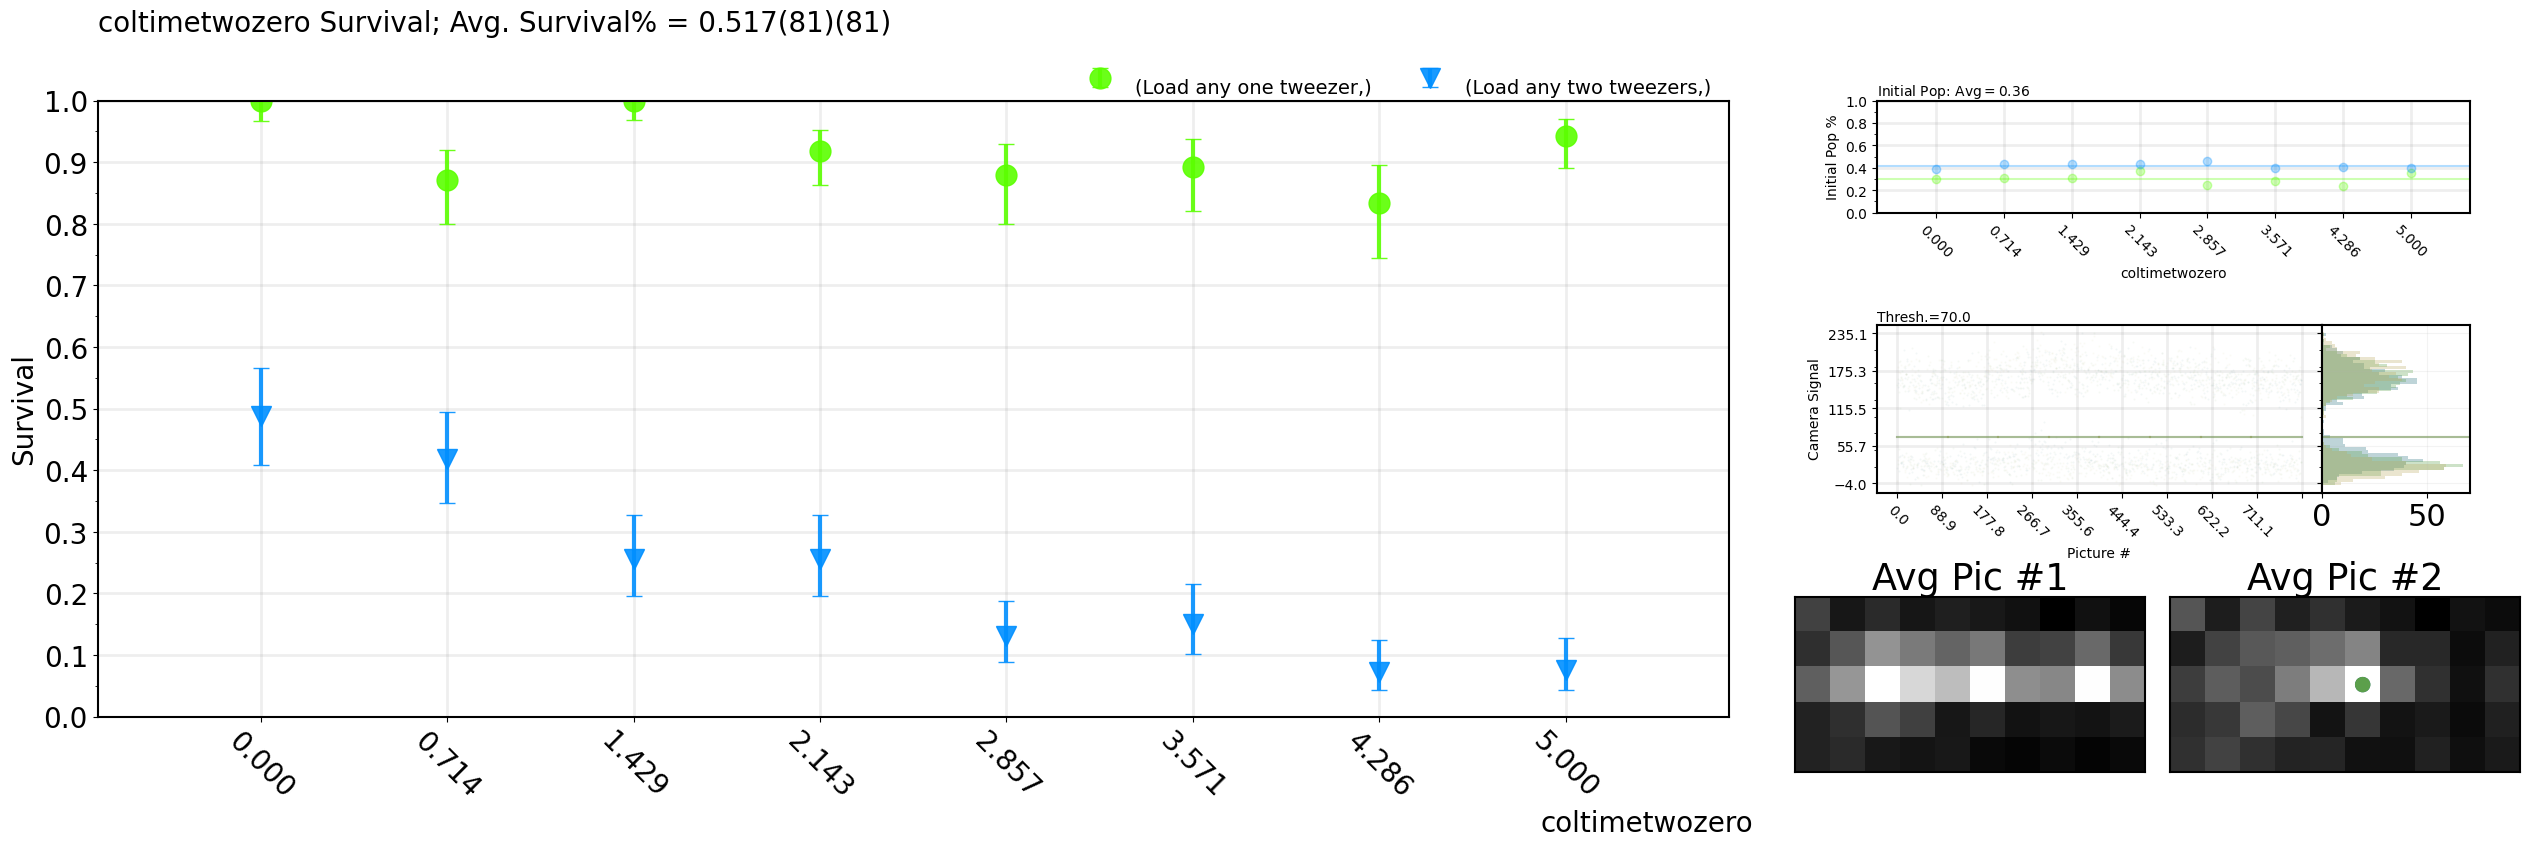

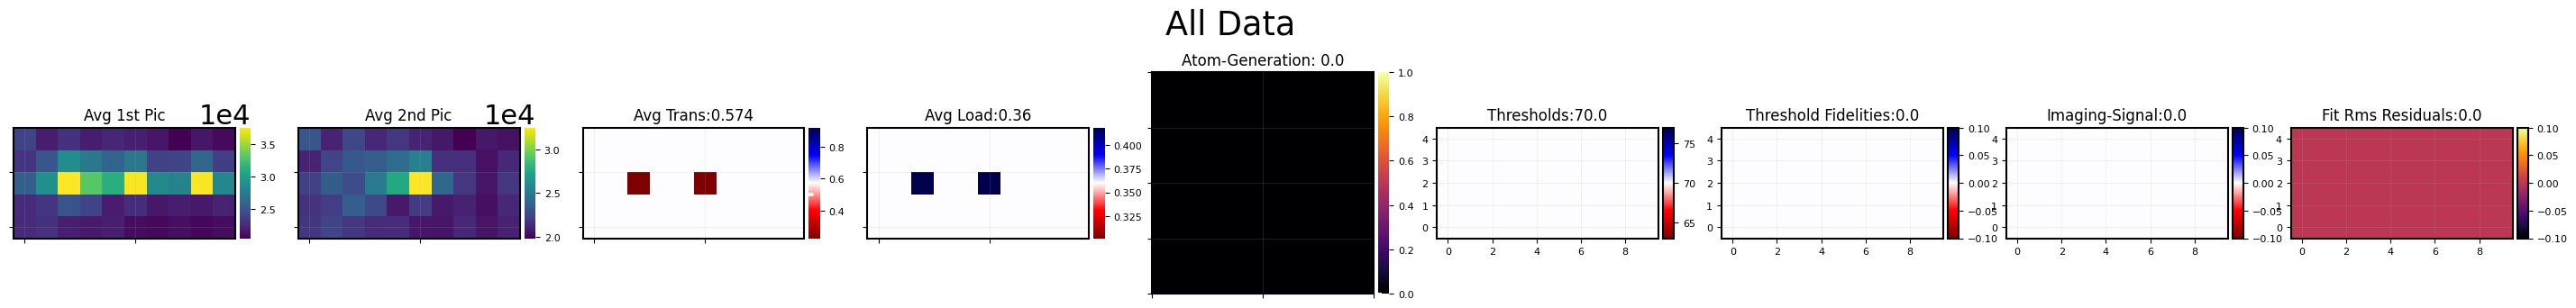

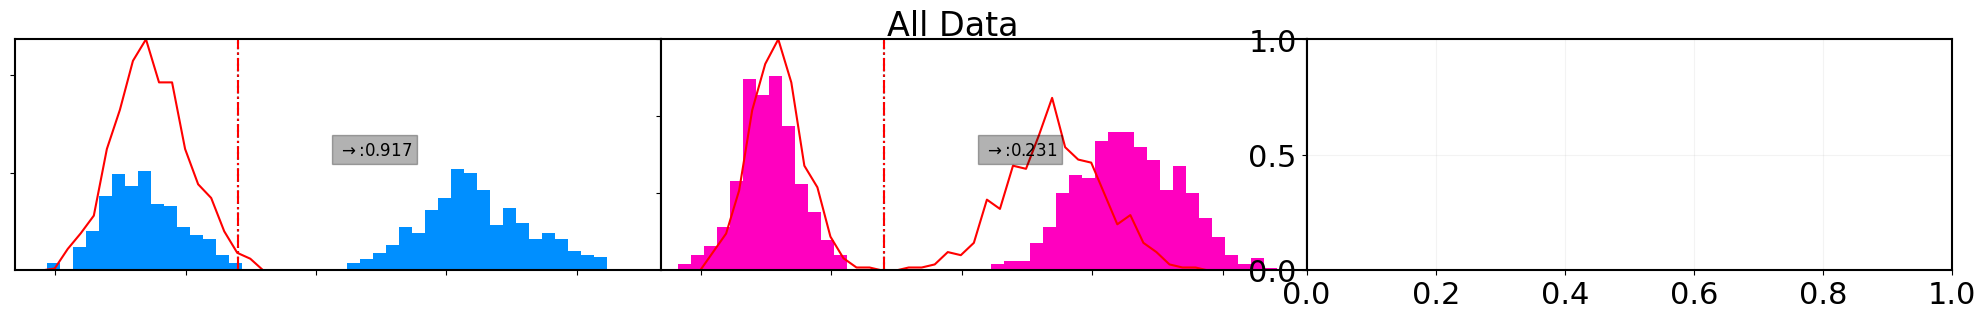

In [80]:
mp.Transfer(28, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 70)]);

In [6]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

## QWP2=0

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 17:3:27: on (Y-M-D) 2023-10-9, And ended at 17:9:38: on 2023-10-9
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 3.2544021726230628 gamma uncertainty = 0.6114671455377367


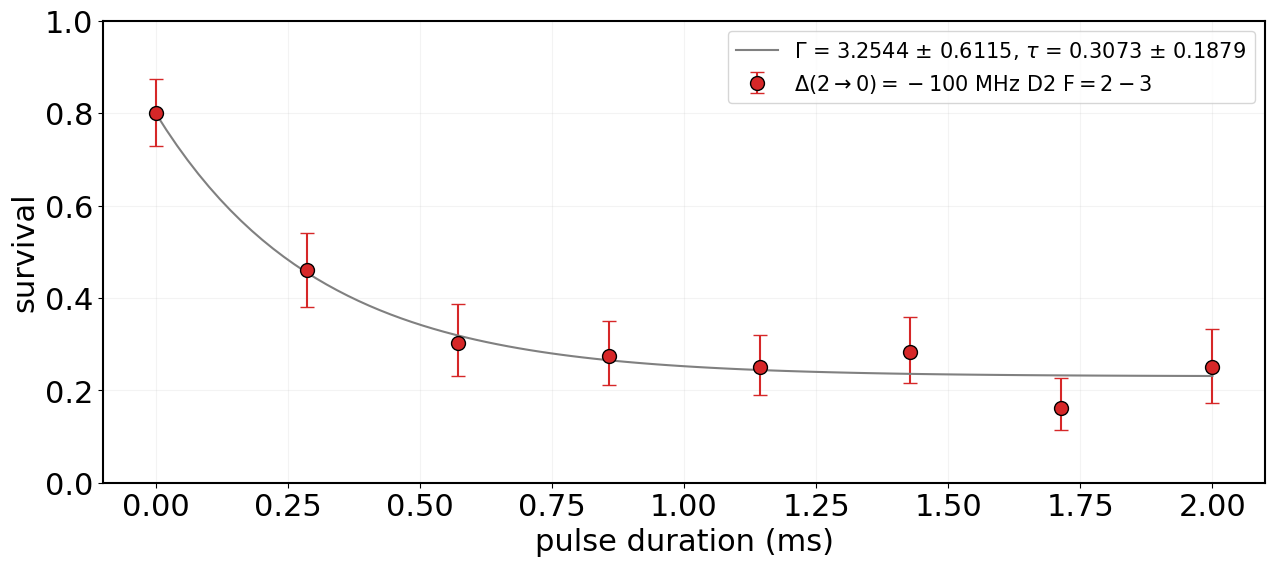

In [111]:
##pulse duraton
reloadMyModules(9)
fileId = 46
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[7] = 0.25
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_0 = decay_constant
gamma_0_unc = decay_constant_uncertainty
tau_0 = one_over_e_time
tau_0_unc_ = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## QWP2=15

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 9:5:8: on (Y-M-D) 2023-10-10, And ended at 9:16:56: on 2023-10-10
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 6.40144450169726 gamma uncertainty = 1.4844150602002997


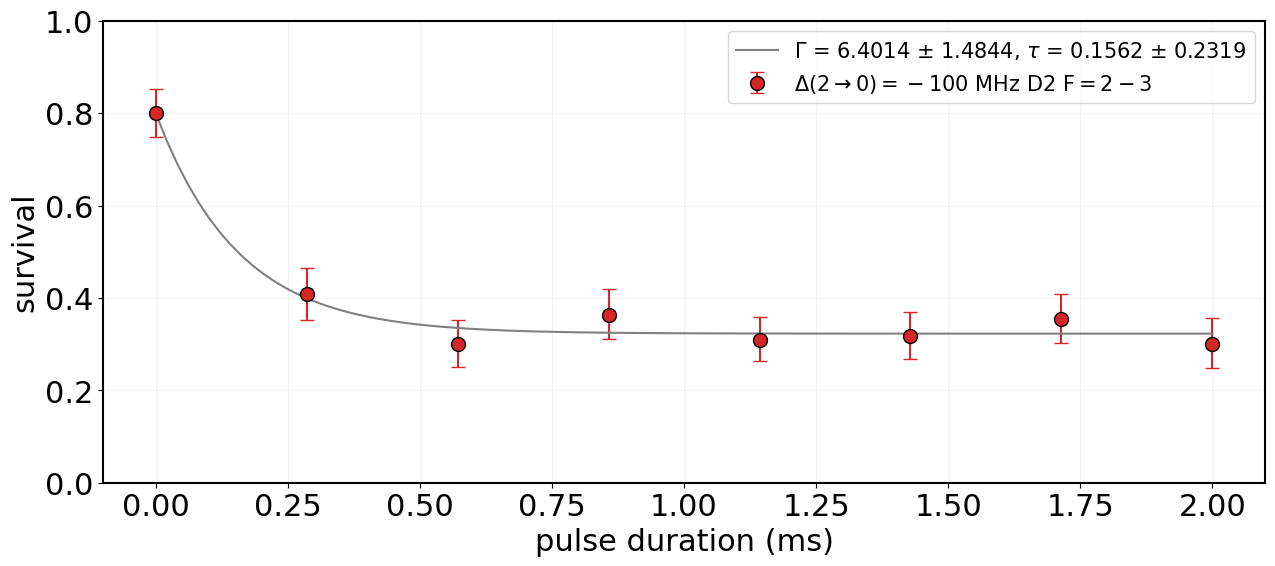

In [ ]:
##pulse duraton
reloadMyModules(10)
fileId = 4
threshold = 65
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[2] = 0.3

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_15 = decay_constant
gamma_15_unc = decay_constant_uncertainty
tau_15 = one_over_e_time
tau_15_unc_ = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## QWP2=30

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 22:2:50: on (Y-M-D) 2023-10-9, And ended at 22:14:35: on 2023-10-9
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 9.502516791069807 gamma uncertainty = 1.2329103680105413


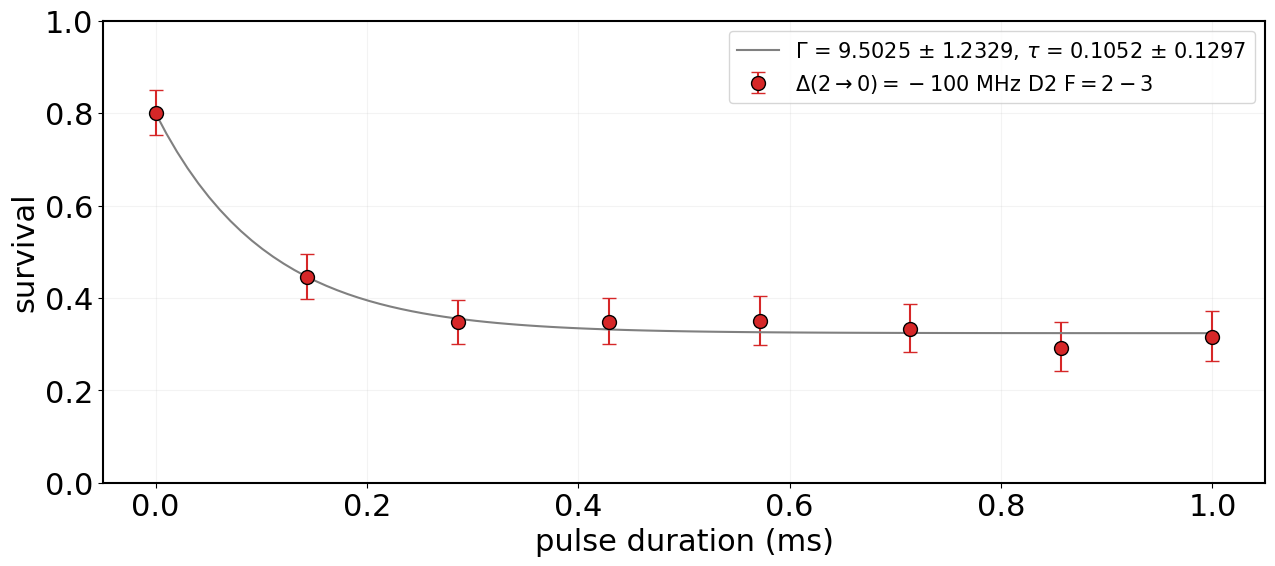

In [ ]:
##pulse duraton
reloadMyModules(9)
fileId = 51
threshold = 65
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_30 = decay_constant
gamma_30_unc = decay_constant_uncertainty
tau_30 = one_over_e_time
tau_30_unc_ = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## QWP2 = 45

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 16:48:17: on (Y-M-D) 2023-10-9, And ended at 16:54:27: on 2023-10-9
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 14.21387645198478 gamma uncertainty = 2.1054859924512903


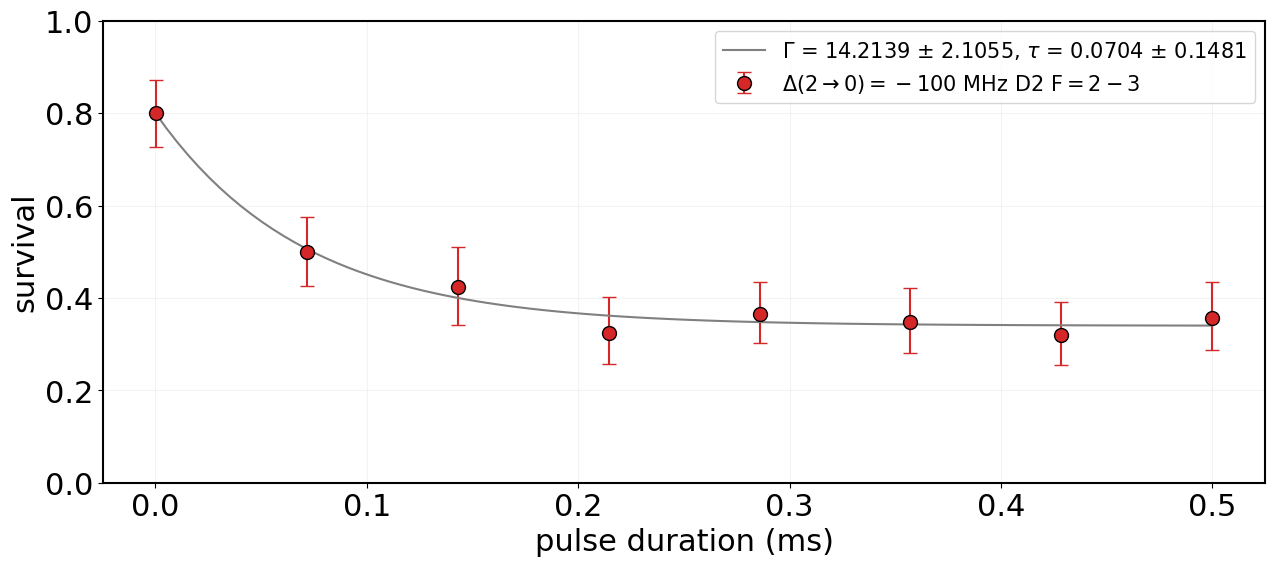

In [77]:
##pulse duraton
reloadMyModules(9)
fileId = 44
threshold = 65
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_45 = decay_constant
gamma_45_unc = decay_constant_uncertainty
tau_45_ = one_over_e_time
tau_45_unc_ = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## QWP2=60

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 22:2:50: on (Y-M-D) 2023-10-9, And ended at 22:14:35: on 2023-10-9
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 10.320697048424854 gamma uncertainty = 1.3734213595828328


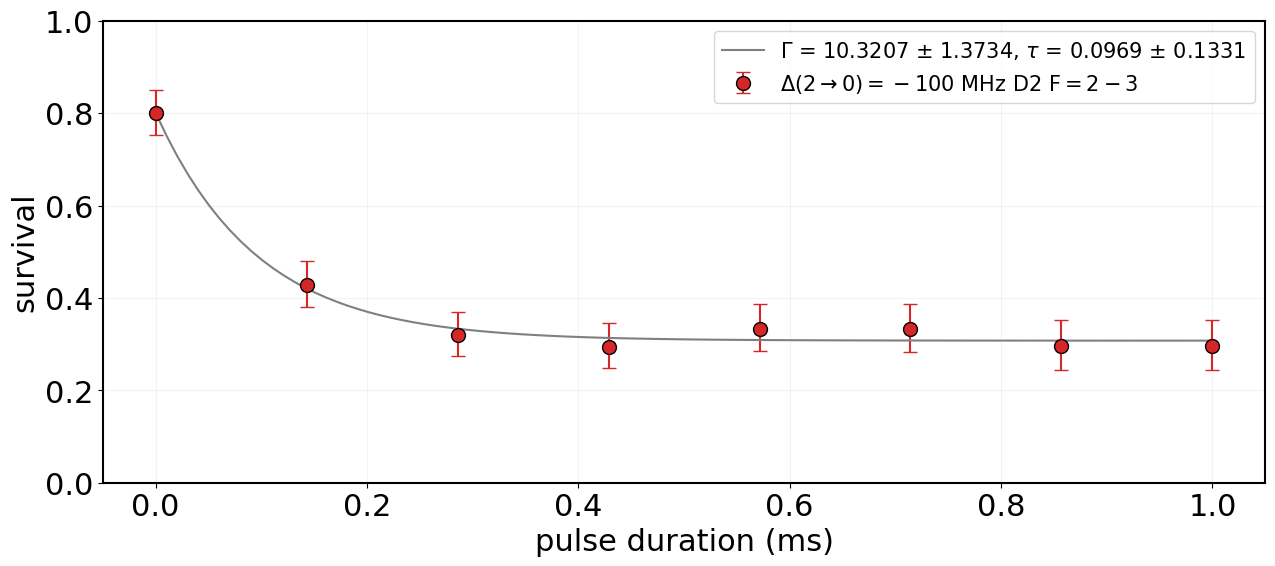

In [132]:
##pulse duraton
reloadMyModules(9)
fileId = 51
threshold = 90
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_60 = decay_constant
gamma_60_unc = decay_constant_uncertainty
tau_60 = one_over_e_time
tau_60_unc_ = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## QWP2=75

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 9:20:36: on (Y-M-D) 2023-10-10, And ended at 9:32:23: on 2023-10-10
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 5.130408403827544 gamma uncertainty = 1.0239434717090063


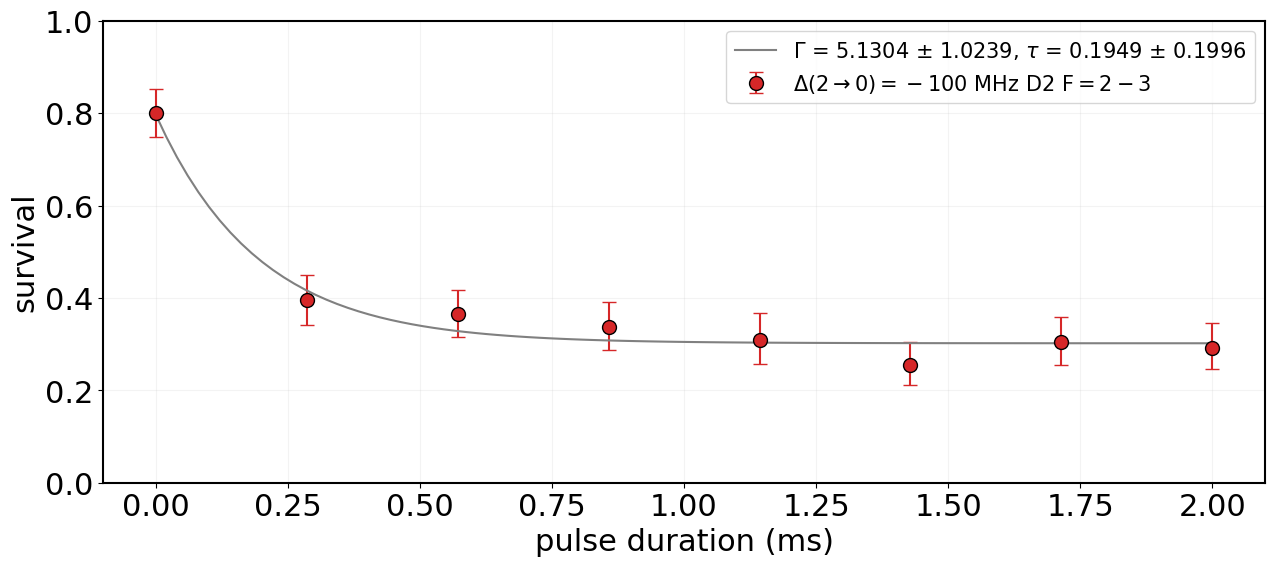

In [84]:
##pulse duraton
reloadMyModules(10)
fileId = 5
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8


x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_75 = decay_constant
gamma_75_unc = decay_constant_uncertainty
tau_75 = one_over_e_time
tau_75_unc_ = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## QWP2=90

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 12:8:32: on (Y-M-D) 2023-10-10, And ended at 12:20:19: on 2023-10-10
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 3.5796750750180455 gamma uncertainty = 1.0652827299691252


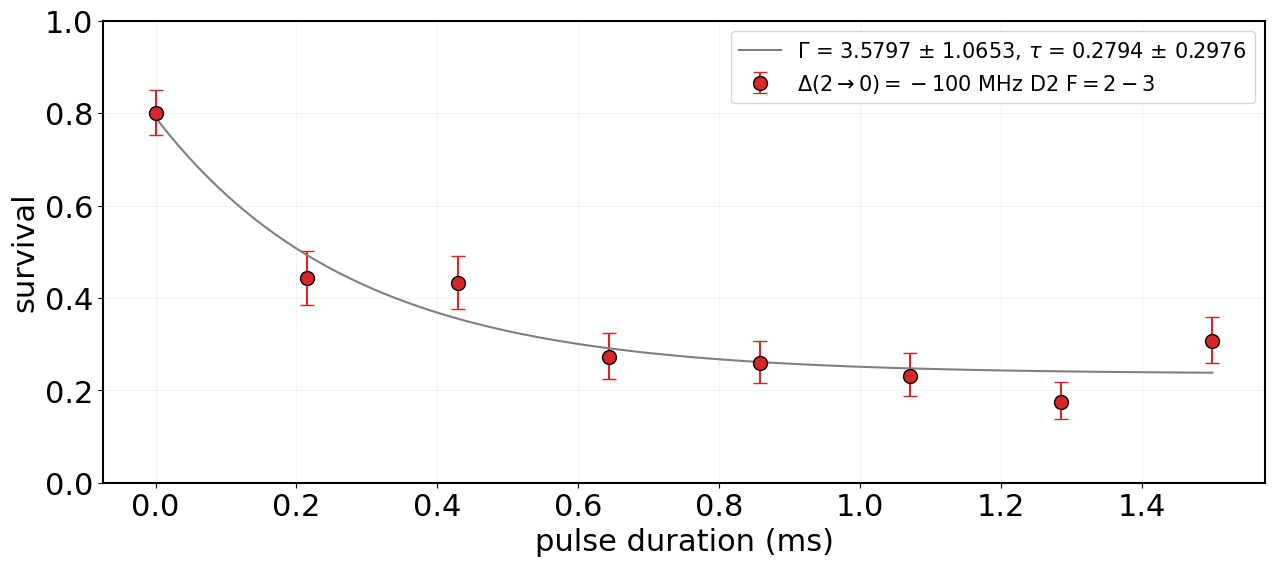

In [105]:
##pulse duraton
reloadMyModules(10)
fileId = 9
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_90 = decay_constant
gamma_90_unc = decay_constant_uncertainty
tau_90 = one_over_e_time
tau_90_unc_ = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## Rate plot

In [17]:
def betaCalc(gamma,trap_depth,T): 
    KelvinToJoules = 1.380648780669e-23
    lmbda = 850e-9
    w_0 = 0.7e-6 # beam waist (radius)
    U = trap_depth*KelvinToJoules # depth in Joules
    w_r = np.sqrt(4*U/(mc.Rb87_M*w_0**2))# Hz
    w_a = w_r / (np.sqrt(2)*w_0*np.pi/lmbda) # Hz
    # w_r = 135000*(2*np.pi)
    # w_a = 25000*(2*np.pi)
    w = (w_r**2 * w_a)**(1/3)
    V = ((2*np.pi*mc.k_B * T/(mc.Rb87_M*w**2))**(3/2))*1e6
    beta = gamma*1e3*2*np.sqrt(2)*V
    # print('beta',beta,w_r/(2*np.pi),w_a/(2*np.pi))
    return V


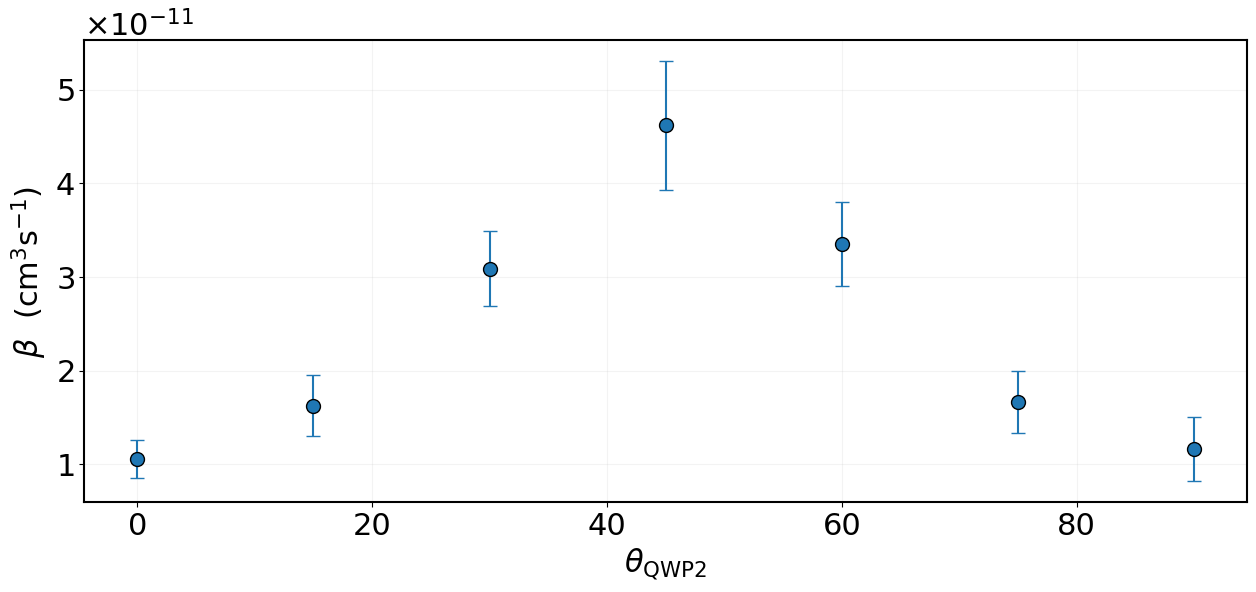

In [135]:

thetaQWP2 = [0,15,30,45,60,75,90]
decay_rate = [gamma_0,gamma_15,gamma_30,gamma_45,gamma_60,gamma_75,gamma_90]
decay_rate_unc = [gamma_0_unc,gamma_15_unc,gamma_30_unc,gamma_45_unc,gamma_60_unc,gamma_75_unc,gamma_90_unc]
decay_rate_error_bar = [decay_rate_unc,decay_rate_unc]
volume_cm3 = betaCalc(1,2.5e-3,30e-6)
beta = [gamma*volume_cm3*1e3 for gamma in decay_rate]
beta_unc = [gamma_unc*volume_cm3*1e3 for gamma_unc in decay_rate_unc]
beta_error = [beta_unc,beta_unc]

color1 = 'tab:blue'
fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(thetaQWP2,beta, yerr=beta_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)

# Use ScalarFormatter for the y-axis labels
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))  # Adjust the scilimits as needed
# plt.text(-60, 4.3e-12, r"$\mathrm{F=2 \rightarrow 1'}$", fontsize=20, color='grey')
# plt.text(765, 4.3e-12, r"$\mathrm{F=2 \rightarrow 2'}$", fontsize=20, color='grey')
# plt.xticks(detuning_valuesD1, detuning_labelsD1)
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\theta_{\mathrm{QWP2}} $')
# plt.title('D1, U = 10 MHz, I = 3S') 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 